**NAME : Ahmed Kashif**
**Date : 10-12-2023**



#Data set overview .


## the data set is about a Retail company based on AUS, the CEO believe his business is growing up sharply so he wants to get some analysis .  

## possible Objectives :
1)	Determine the states that are generating the highest revenues and.         
2)	Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same

In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 26.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.0
    Uninstalling Werkzeug-3.0.0:
      Successfully uninstalled Werkzeug-3.0.0


In [ ]:
#import the librbaires that i will need in order to clean , visulize and analyze the data set

In [ ]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

#--------------------------------------------------------------------------------------------------------------------------------------------

# Data Exploration

## 0.1 look into the data set by head and info to see what & how many columns and rows we have

In [ ]:
#Load the data set using pandas as df , so we can call it easily

In [ ]:
df = pd.read_excel('data.xlsx')


In [ ]:
df.head(5)

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


## 0.2  states in AUS  

In [ ]:
for state in df['State'].unique():
  print(state)

 WA
 NT
 SA
 VIC
 QLD
 NSW
 TAS


## 0.3 Groups

In [ ]:
#Possible groups
for group in df['Group'].unique():
  print(group)

 Kids
 Men
 Women
 Seniors


## 0.4 Time

In [ ]:
#Possible Times
for Time in df['Time'].unique():
  print(Time)

 Morning
 Afternoon
 Evening


## 0.5 Date Rnage

In [ ]:

min_date = df['Date'].min()
max_date = df['Date'].max()

# Print the date range
print("Date Range: {} to {}".format(min_date, max_date))
# we see that the data is for 3 months , October, November and December , last quarter of the year 2020

Date Range: 2020-10-01 00:00:00 to 2020-12-30 00:00:00


## data distribution

In [ ]:
# Before Normalization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


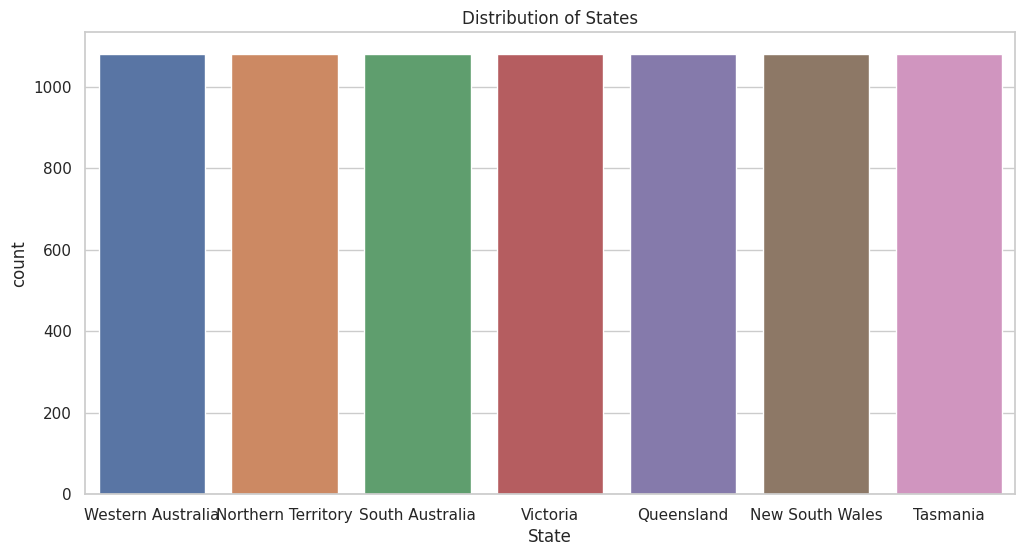

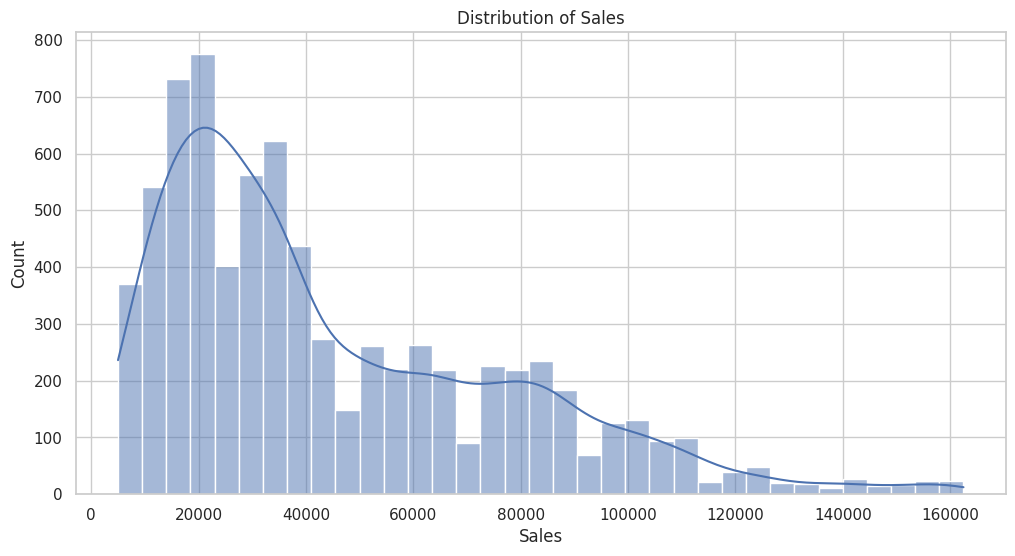

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x="State", order=df["State"].value_counts().index)
plt.title("Distribution of States")

plt.figure(figsize=(12, 6))

sns.histplot(data=df, x="Sales", kde=True)
plt.title("Distribution of Sales")

plt.show()


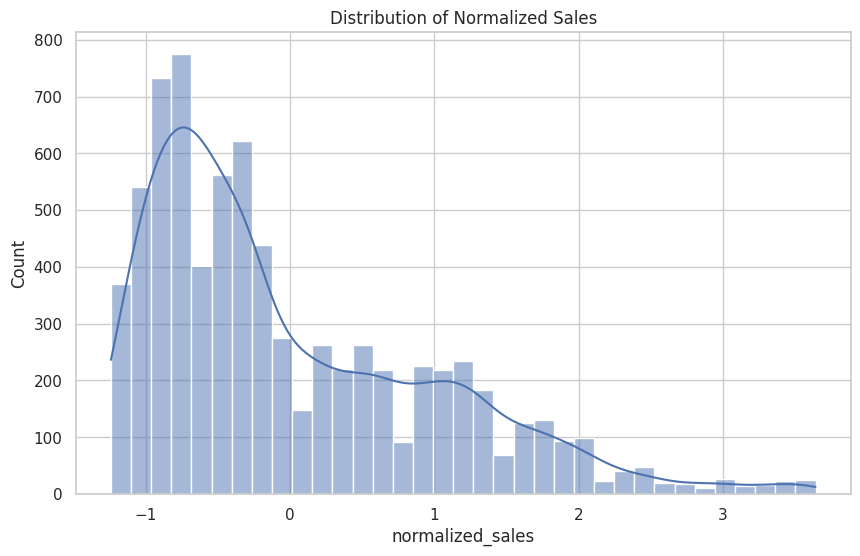

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

sales_data = df['Sales'].values.reshape(-1, 1)


scaler = StandardScaler()

normalized_sales = scaler.fit_transform(sales_data)
df['normalized_sales'] = normalized_sales

# Plot the distribution of the normalized 'sales' column
plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_sales'], kde=True)
plt.title("Distribution of Normalized Sales")

plt.show()



#--------------------------------------------------------------------------------------------------------------------------------------------


#Step 1: Data Wrangling



## 1.1  NA values : There is no missing value , all columns are 7560 rows


In [ ]:
missing_count = df.isna().sum()
print(missing_count)

Date         0
Time         0
State        0
Group        0
Unit         0
Sales        0
YearMonth    0
dtype: int64


## 1.2 Data Types - All columns appear to be in an appropriate data type format.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


## 1.3 :duplicates

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


In [ ]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


## 1.4: Outliers :

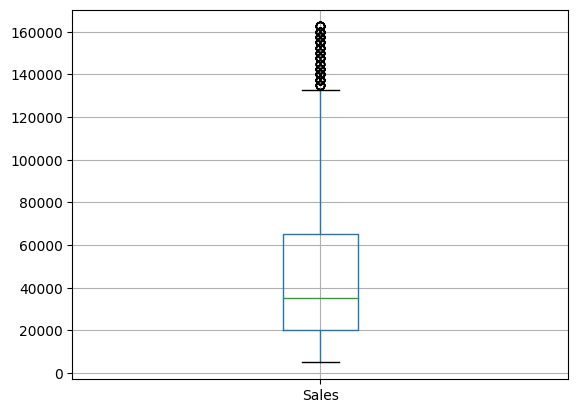

In [ ]:
df.boxplot(column=['Sales'])
plt.show()


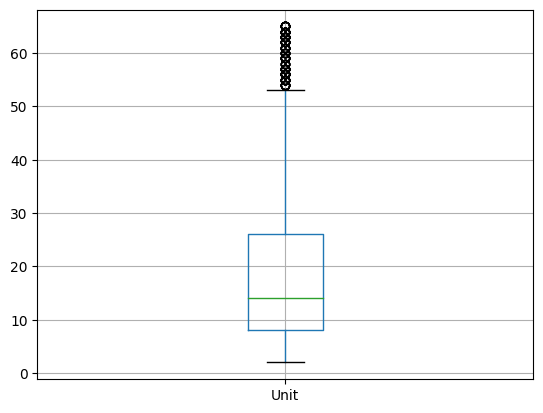

In [ ]:

df.boxplot(column=[ 'Unit'])
plt.show()


1.5 stete change to its name



In [ ]:
# we see that there are 7 states in AUS , but I decided to change the states names to its real name beside the code
state_mapping = {
    'SA': 'South Australia',
    'NSW': 'New South Wales',
    'VIC': 'Victoria',
    'QLD': 'Queensland',
    'WA': 'Western Australia',
    'TAS': 'Tasmania',
    'NT': 'Northern Territory'
}
df['State'] = df['State'].str.strip().replace(state_mapping)




#---------------------------------------------------------------------------------------------------------------------------------------------

# Step 2 : Data analysis

##2.1 statistical Analysis

In [ ]:
#statistical analysis for 'Sales' column
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_mode = df['Sales'].mode().values[0]
sales_std = df['Sales'].std()


unit_mean = df['Unit'].mean()
unit_median = df['Unit'].median()
unit_mode = df['Unit'].mode().values[0]
unit_std = df['Unit'].std()
unit_mean = int(unit_mean)
unit_median = int(unit_median)
unit_mode = int(unit_mode)
unit_std = int(unit_std)


print("Sales Statistics:")
print("Mean:", sales_mean)
print("Median:", sales_median)
print("Mode:", sales_mode)
print("Standard Deviation:", sales_std)
print("\nUnit Statistics:")
print("Mean:", unit_mean)
print("Median:", unit_median)
print("Mode:", unit_mode)
print("Standard Deviation:", unit_std)


Sales Statistics:
Mean: 45013.5582010582
Median: 35000.0
Mode: 22500
Standard Deviation: 32253.506943966073

Unit Statistics:
Mean: 18
Median: 14
Mode: 9
Standard Deviation: 12


##2.2 Sales by group

In [ ]:
total_sales_by_group = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
print(total_sales_by_group)

Group
 Men        85750000
 Women      85442500
 Kids       85072500
 Seniors    84037500
Name: Sales, dtype: int64


 From the dataset and the above table : Men are the highest group making profits , seniors are the loewst

##2.3 Sales by States

In [ ]:
total_sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(total_sales_by_state)


State
Victoria              105565000
New South Wales        74970000
South Australia        58857500
Queensland             33417500
Tasmania               22760000
Northern Territory     22580000
Western Australia      22152500
Name: Sales, dtype: int64


From the above table , Victoria has the highest sales number , W Australia is the loewst

##2.4 Weekly , quartly and monthly reports

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])
weekly_report = df.resample('W', on='Date').sum()
# i chose from day wed so its 7 days
print("Weekly Report:")
print(weekly_report)

Weekly Report:
             Unit     Sales
Date                       
2020-10-04   6018  15045000
2020-10-11  10801  27002500
2020-10-18  10656  26640000
2020-10-25  10726  26815000
2020-11-01   8723  21807500
2020-11-08   8346  20865000
2020-11-15   8469  21172500
2020-11-22   8445  21112500
2020-11-29   8591  21477500
2020-12-06  11849  29622500
2020-12-13  12610  31525000
2020-12-20  12662  31655000
2020-12-27  12708  31770000
2021-01-03   5517  13792500


<ipython-input-31-ecee273b0a24>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_report = df.resample('W', on='Date').sum()


In [ ]:
monthly_report = df.resample('M', on='Date').sum()
print("\nMonthly Report:")
print(monthly_report)

In [ ]:
quarterly_report = df.resample('Q', on='Date').sum()
print(quarterly_report)

              Unit      Sales
Date                         
2020-12-31  136121  340302500


<ipython-input-27-07bda906a4fe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_report = df.resample('Q', on='Date').sum()


Additional analysis

In [ ]:
total_sales_by_Time = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)
print(total_sales_by_Time)

Time
 Morning      114207500
 Afternoon    114007500
 Evening      112087500
Name: Sales, dtype: int64


In [ ]:
total_sales_by_month = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print(total_sales_by_month)


Month
December    135330000
October     114290000
November     90682500
Name: Sales, dtype: int64



#--------------------------------------------------------------------------------------------------------------------------------------------

#Step 3: Data Visualization

## 3.1 Dashboard

In [ ]:
!pip install pandas seaborn matplotlib


In [ ]:
pip install mpld3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 4.2 MB/s eta 0:00:00


<ipython-input-31-2d546aa62e94>:25: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-31-2d546aa62e94>:31: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-31-2d546aa62e94>:37: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



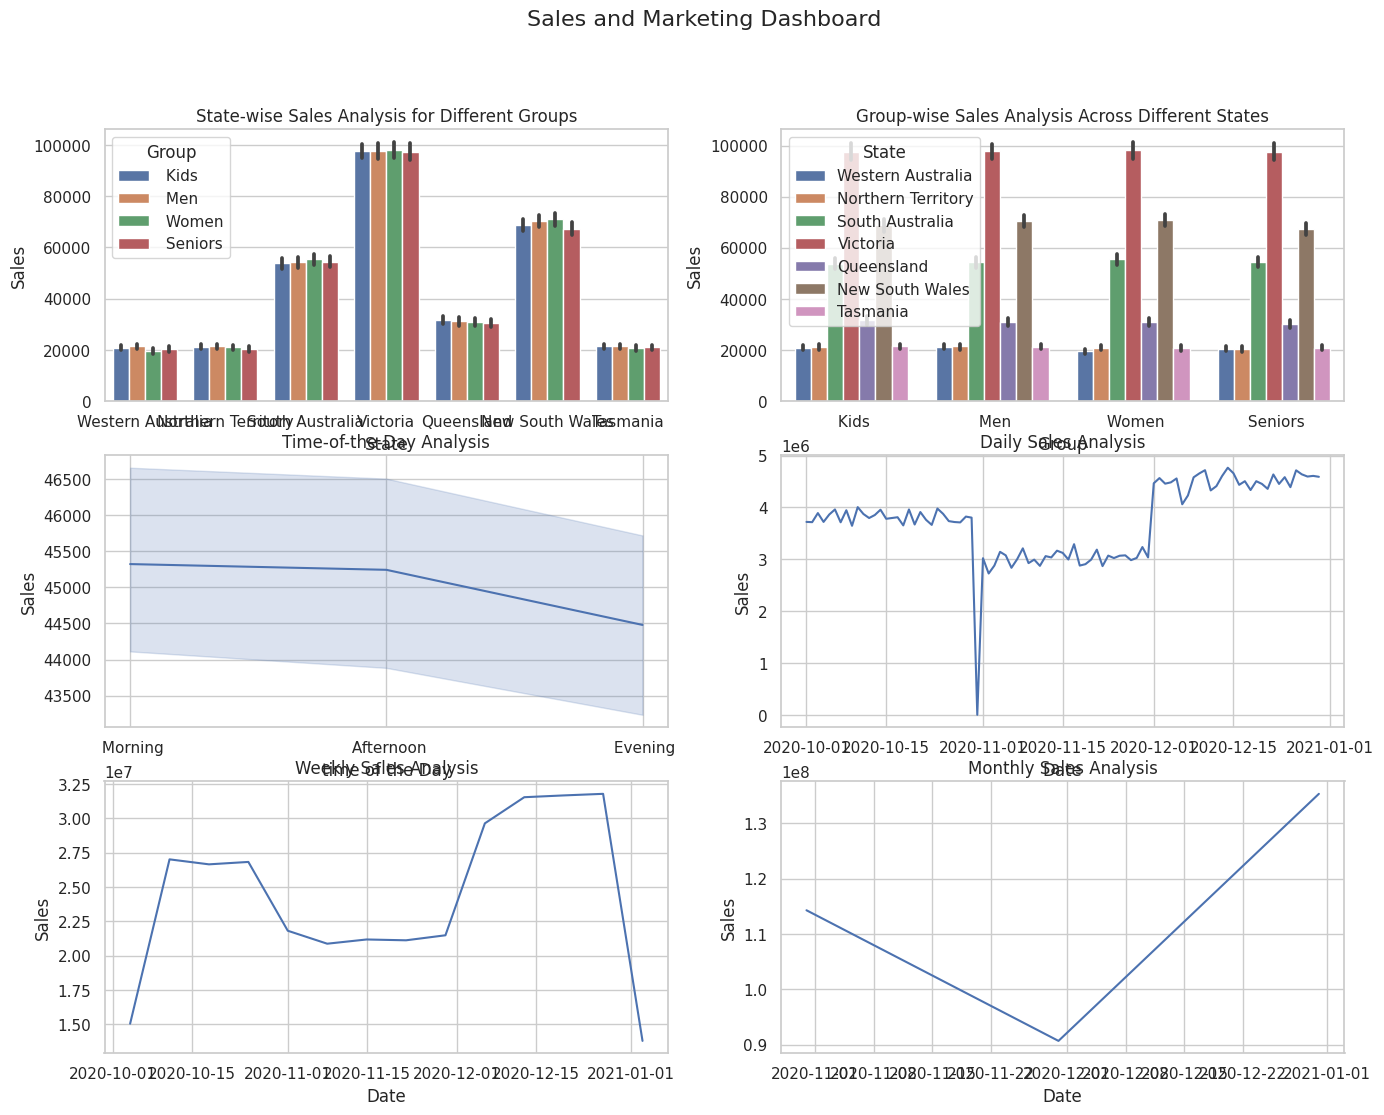

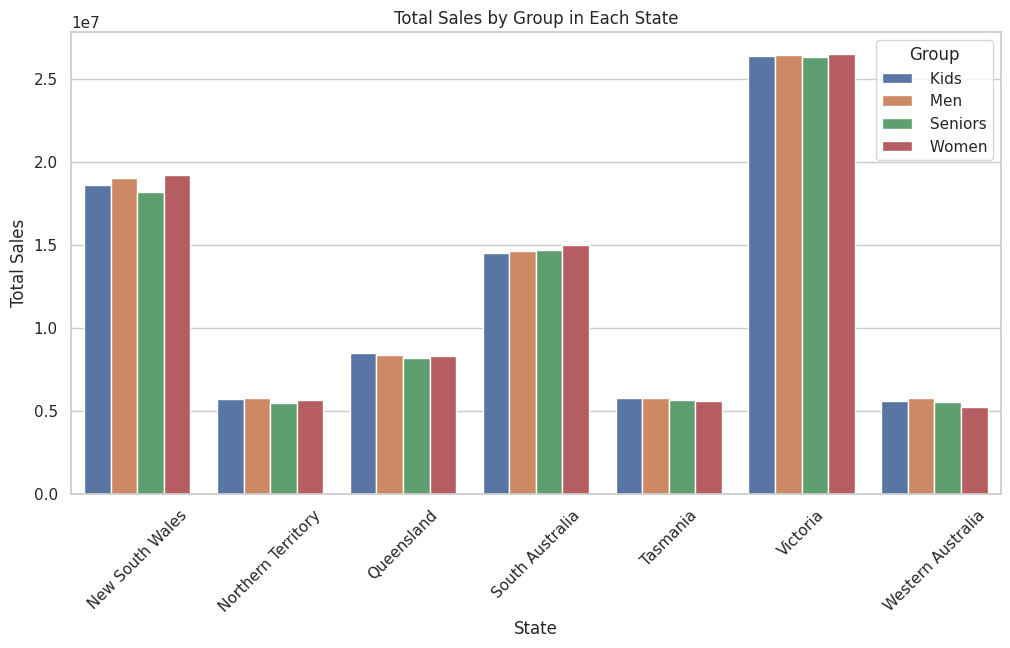

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/mpld3/mplexporter/exporter.py:179: UserWarning:

Legend element <matplotlib.offsetbox.HPacker object at 0x7ac73900bf40> not impemented

/usr/local/lib/python3.10/dist-packages/mpld3/mplexporter/exporter.py:179: UserWarning:

Legend element <matplotlib.offsetbox.HPacker object at 0x7ac7390383d0> not impemented

/usr/local/lib/python3.10/dist-packages/mpld3/mplexporter/exporter.py:179: UserWarning:

Legend element <matplotlib.offsetbox.HPacker object at 0x7ac739038820> not impemented

/usr/local/lib/python3.10/dist-packages/mpld3/mplexporter/exporter.py:179: UserWarning:

Legend element <matplotlib.offsetbox.HPacker object at 0x7ac739038c70> not impemented



In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle("Sales and Marketing Dashboard", fontsize=16)

# Chart 1: State-wise sales analysis for different groups
sns.barplot(x='State', y='Sales', hue='Group', data=df, ax=axes[0, 0])
axes[0, 0].set_title("State-wise Sales Analysis for Different Groups")

# chart 2: Group-wise sales analysis across different states
sns.barplot(x='Group', y='Sales', hue='State', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Group-wise Sales Analysis Across Different States")

# Chart 3: Time-of-the-day analysis

sns.lineplot(x='Time', y='Sales', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Time-of-the-Day Analysis")
axes[1, 0].set_xlabel("time of the Day")

# Chart 4: Daily Sales Analysis
daily_sales = df.resample('D', on='Date').sum()
sns.lineplot(x=daily_sales.index, y=daily_sales['Sales'], ax=axes[1, 1])
axes[1, 1].set_title("Daily Sales Analysis")
axes[1, 1].set_xlabel("Date")

# Chart 5: Weekly Sales Analysis
weekly_sales = df.resample('W', on='Date').sum()
sns.lineplot(x=weekly_sales.index, y=weekly_sales['Sales'], ax=axes[2, 0])
axes[2, 0].set_title("Weekly Sales Analysis")
axes[2, 0].set_xlabel("Date")

# Chart 6 Monthly Sales Analysis
monthly_sales = df.resample('M', on='Date').sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales['Sales'], ax=axes[2, 1])
axes[2, 1].set_title("Monthly Sales Analysis")
axes[2, 1].set_xlabel("Date")

# additinal :


grouped_data = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='State', y='Sales', hue='Group')
plt.title('Total Sales by Group in Each State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.show()

for ax in axes.flatten():
    ax.set_ylabel("Total Sales")
    ax.legend(title="Parameter", loc="upper left")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

import pandas as pd
import seaborn as sns
import mpld3


# save as html

# Save the figure to an HTML file
html_output = mpld3.fig_to_html(fig)
with open("outpuut.html", "w") as f:
    f.write(html_output)



**I recommend Seaborn for  data visualization because it offers aesthetically pleasing visuals, simplifies complex statistical analysis, and integrates well with Pandas. It provides built-in color palettes and supports a wide range of plot types. Using Seaborn ensures your visualizations are both informative and visually appealing.**

##3.2 Charts insights:

1- Victoria State has the highest sales in all groups , this is understandable because it the biggest state in AUS.

2- Tasmania has the kowest number of sales with similar behavior of all groups

3- Morning time is the best time for AUS people for Shopping

4- October has the lowest sales number , Decmber has the max , its understandable for the holidays probably

5- in the first of November, there was a crash in the sales